In [15]:
import geometricus
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prody as pd

In [67]:
PDB_ID = "6dmw"

In [69]:
protein = pd.parsePDB(PDB_ID, chain="A")

In [71]:
moment_types = list(geometricus.MomentType)

In [72]:
invariants_kmer = geometricus.MomentInvariants.from_prody_atomgroup(PDB_ID, protein, 
                                                                    split_type=geometricus.SplitType.KMER,
                                                                    split_size=16,
                                                                    moment_types=moment_types)

In [73]:
invariants_kmer.moments.shape

(631, 16)

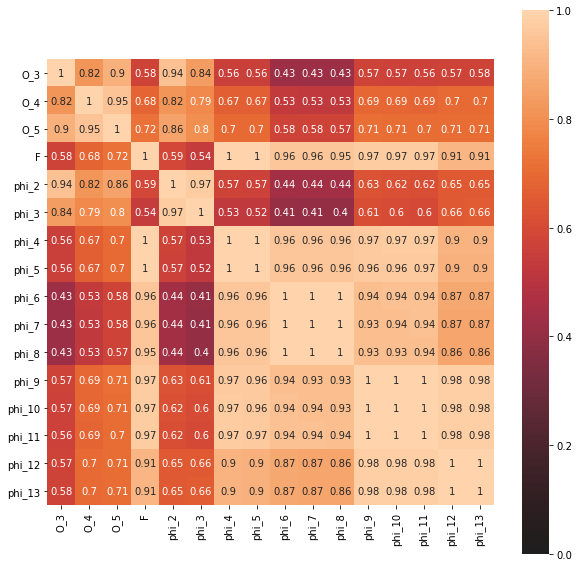

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(np.corrcoef(invariants_kmer.moments.T), 
            xticklabels=[m.name for m in moment_types],
            yticklabels=[m.name for m in moment_types],
            vmin=0, vmax=1, 
            center=0, annot=True, square=True)

In [77]:
invariants_radius = geometricus.MomentInvariants.from_prody_atomgroup(PDB_ID, protein, 
                                                                      split_type=geometricus.SplitType.RADIUS,
                                                                      split_size=10,
                                                                      moment_types=moment_types)

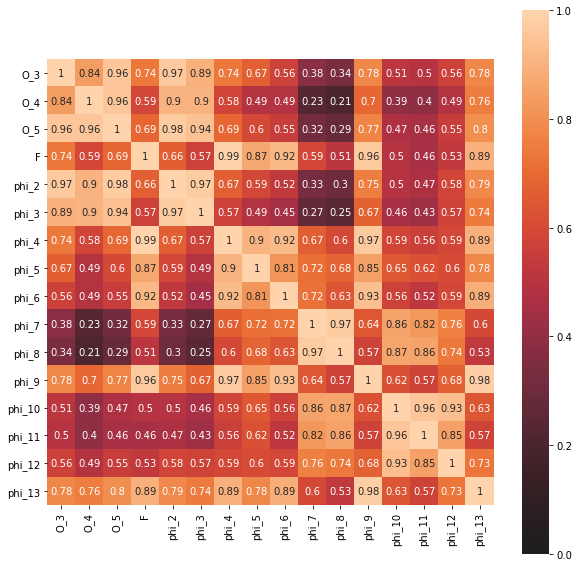

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(np.corrcoef(invariants_radius.moments.T), 
            xticklabels=[m.name for m in moment_types],
            yticklabels=[m.name for m in moment_types],
            vmin=0, vmax=1, 
            center=0, annot=True, square=True)